# Raw_CFD_Calculation

# Set up environment

In [1]:
import numpy as np
import pandas as pd

# Board configuration

In [2]:
# rows = Cards

no_rows = 12

# ---  postit-id / 
column_names = ['postit', 'analysis_active', 'analysis_passive', 'implementation', 'deployed']
cfd_columns = ['analysis_active', 'implementation', 'deployed'] # TODO Change name?

# Generate one example

# Generate Vectorized version

# Generate raw test data

In [3]:
start_date = pd.Timestamp('2020-02-01 08:00:00')

In [4]:
min_start_delay = 0
max_start_delay = 2 * 24 * 60

random_delay_in_minutes = np.random.randint(min_start_delay, high=max_start_delay, size=no_rows)
random_delay_in_minutes

array([2323,  797, 1622, 2189, 2426,  472, 2151, 2713, 2407,  778, 2072,
        757])

In [5]:
random_delays = pd.Series([pd.Timedelta(minutes=m) for m in random_delay_in_minutes])
random_delays

0    1 days 14:43:00
1    0 days 13:17:00
2    1 days 03:02:00
3    1 days 12:29:00
4    1 days 16:26:00
5    0 days 07:52:00
6    1 days 11:51:00
7    1 days 21:13:00
8    1 days 16:07:00
9    0 days 12:58:00
10   1 days 10:32:00
11   0 days 12:37:00
dtype: timedelta64[ns]

In [6]:
min_duration = 25
max_duration = 7 * 60

def random_duration_column():
    random_duration_column_in_minutes = np.random.randint(min_duration, high=max_duration, size=no_rows)
    return pd.Series([pd.Timedelta(minutes=m) for m in random_duration_column_in_minutes])

In [7]:
random_duration_column()

0    02:48:00
1    01:38:00
2    05:55:00
3    02:18:00
4    01:36:00
5    03:15:00
6    00:39:00
7    04:13:00
8    02:06:00
9    03:15:00
10   00:34:00
11   05:08:00
dtype: timedelta64[ns]

In [8]:
postits = pd.DataFrame()
postits[column_names[0]] = range(no_rows)
postits[column_names[1]] = start_date + random_delays

In [9]:
postits

,postit,analysis_active
0,0,2020-02-02 22:43:00
1,1,2020-02-01 21:17:00
2,2,2020-02-02 11:02:00
3,3,2020-02-02 20:29:00
4,4,2020-02-03 00:26:00
5,5,2020-02-01 15:52:00
6,6,2020-02-02 19:51:00
7,7,2020-02-03 05:13:00
8,8,2020-02-03 00:07:00
9,9,2020-02-01 20:58:00


In [10]:
for c in range(2, len(column_names)): #Naming
    print( column_names[c] )
    before = column_names[c-1]
    postits[column_names[c]] = postits[before] + random_duration_column()
    postits.loc[np.random.randint(0, no_rows, 2), column_names[c]] = np.NaN

analysis_passive
implementation
deployed


In [11]:
postits

,postit,analysis_active,analysis_passive,implementation,deployed
0,0,2020-02-02 22:43:00,2020-02-03 04:20:00,NaT,NaT
1,1,2020-02-01 21:17:00,2020-02-01 23:41:00,2020-02-02 03:18:00,2020-02-02 08:36:00
2,2,2020-02-02 11:02:00,2020-02-02 13:26:00,2020-02-02 16:54:00,NaT
3,3,2020-02-02 20:29:00,2020-02-03 02:10:00,NaT,NaT
4,4,2020-02-03 00:26:00,2020-02-03 05:01:00,2020-02-03 06:10:00,NaT
5,5,2020-02-01 15:52:00,2020-02-01 17:16:00,2020-02-01 23:55:00,2020-02-02 03:13:00
6,6,2020-02-02 19:51:00,2020-02-03 00:57:00,2020-02-03 06:48:00,2020-02-03 13:33:00
7,7,2020-02-03 05:13:00,2020-02-03 09:21:00,2020-02-03 12:13:00,2020-02-03 18:31:00
8,8,2020-02-03 00:07:00,2020-02-03 06:10:00,2020-02-03 08:56:00,2020-02-03 10:18:00
9,9,2020-02-01 20:58:00,2020-02-02 03:28:00,2020-02-02 05:46:00,2020-02-02 09:04:00


# Derive Cummulated Control Flow Data

Two possible approaches:
  * Fixed pulse 
  * Infer all event times <--

In [12]:
event_times = sorted(pd.concat([postits[cn] for cn in cfd_columns]).dropna())
event_times

[Timestamp('2020-02-01 15:52:00'),
 Timestamp('2020-02-01 20:37:00'),
 Timestamp('2020-02-01 20:58:00'),
 Timestamp('2020-02-01 21:17:00'),
 Timestamp('2020-02-01 23:55:00'),
 Timestamp('2020-02-02 03:13:00'),
 Timestamp('2020-02-02 03:18:00'),
 Timestamp('2020-02-02 05:46:00'),
 Timestamp('2020-02-02 08:36:00'),
 Timestamp('2020-02-02 09:04:00'),
 Timestamp('2020-02-02 11:02:00'),
 Timestamp('2020-02-02 16:54:00'),
 Timestamp('2020-02-02 18:32:00'),
 Timestamp('2020-02-02 19:51:00'),
 Timestamp('2020-02-02 20:29:00'),
 Timestamp('2020-02-02 22:43:00'),
 Timestamp('2020-02-03 00:07:00'),
 Timestamp('2020-02-03 00:26:00'),
 Timestamp('2020-02-03 05:13:00'),
 Timestamp('2020-02-03 06:10:00'),
 Timestamp('2020-02-03 06:48:00'),
 Timestamp('2020-02-03 08:56:00'),
 Timestamp('2020-02-03 10:18:00'),
 Timestamp('2020-02-03 12:13:00'),
 Timestamp('2020-02-03 13:33:00'),
 Timestamp('2020-02-03 18:31:00')]

In [13]:
time_column = 'event_time'
cfd_data = pd.DataFrame(columns=[time_column] + cfd_columns)

cfd_data

cfd_data[time_column] = pd.Series(event_times)

cfd_data

,event_time,analysis_active,implementation,deployed
0,2020-02-01 15:52:00,NaN,NaN,NaN
1,2020-02-01 20:37:00,NaN,NaN,NaN
2,2020-02-01 20:58:00,NaN,NaN,NaN
3,2020-02-01 21:17:00,NaN,NaN,NaN
4,2020-02-01 23:55:00,NaN,NaN,NaN
5,2020-02-02 03:13:00,NaN,NaN,NaN
6,2020-02-02 03:18:00,NaN,NaN,NaN
7,2020-02-02 05:46:00,NaN,NaN,NaN
8,2020-02-02 08:36:00,NaN,NaN,NaN
9,2020-02-02 09:04:00,NaN,NaN,NaN


In [23]:
gone_to_the_right = np.zeros(len(event_times), dtype=int) # TODO There should be a constructor for zeros Series'

for this_column in reversed(cfd_columns):
    reached_this_column = [sum(postits[this_column] <= t) for t in event_times]
    cfd_data[this_column] = pd.Series(reached_this_column) - pd.Series(gone_to_the_right)
    gone_to_the_right = reached_this_column
    
cfd_data

,event_time,analysis_active,implementation,deployed
0,2020-02-01 15:52:00,1,0,0
1,2020-02-01 20:37:00,2,0,0
2,2020-02-01 20:58:00,3,0,0
3,2020-02-01 21:17:00,4,0,0
4,2020-02-01 23:55:00,3,1,0
5,2020-02-02 03:13:00,3,0,1
6,2020-02-02 03:18:00,2,1,1
7,2020-02-02 05:46:00,1,2,1
8,2020-02-02 08:36:00,1,1,2
9,2020-02-02 09:04:00,1,0,3


In [15]:
# cfd_data.set_index(time_column)

# Cumulative Flow Diagram

## Display CFD based on events

<IPython.core.display.Javascript object>


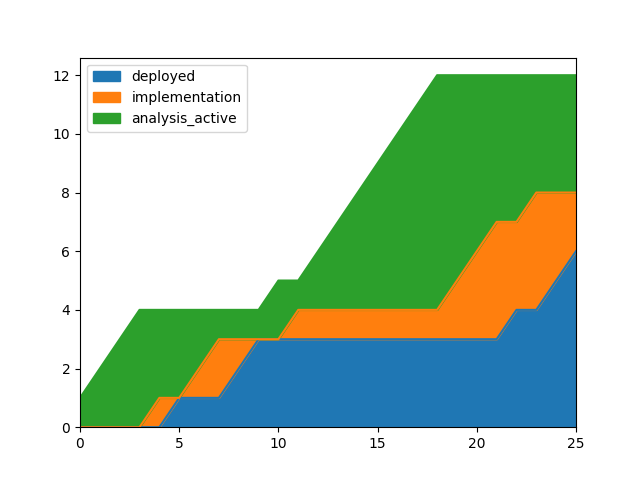

In [16]:
%matplotlib notebook

cfd_data.plot.area(y=list(reversed(cfd_columns)))

In [17]:
# cfd_data.set_index(time_column)

## Display CDF based on Time

<IPython.core.display.Javascript object>


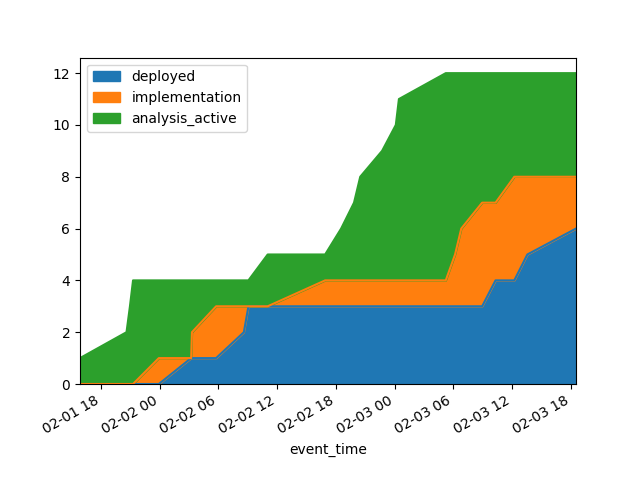

In [18]:
cfd_data.plot.area(x=time_column, y=list(reversed(cfd_columns)))

# Tutorials

In [19]:
reversed(cfd_columns)

In [20]:
list(reversed(cfd_columns))

['deployed', 'implementation', 'analysis_active']

In [21]:
squares = [i*i for i in range(1, 5) if i % 2 == 0]
squares

[4, 16]

In [22]:
sum([True, False, False, True, False, True]) 

3